# Seminar in Computer Science Course Project
## By Owen Harvey
### This Project Covers How Lifestyle can Effect Sleep and Overall Health

#### For this project I used the [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/851c829b2a41e6dd0b5a60388cd4a2cfda2d54433450ed12141237416c8161bc)

##### About the Data: 
- The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders. I will  note the author of this data noted that the data is synthetic and created for educational purposes.

#### Key Features of the Dataset:
- Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
- Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
- Cardiovascular Health: Examine blood pressure and heart rate measurements.
- Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

##### Data Columns:
- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).
    - None: The individual does not exhibit any specific sleep disorder.
    - Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
    - Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

### This project will contain:
1. A brief overview of my Literature Review.
2. Data Preprocessing.
    - The data I'm using was already gathered and found on Kaggle. 
3. Regression Analysis.
4. A Writen Report.


# Literature Review

#### The Impact of Physical Activity on Sleep and Overall Health Indicators 
Physical activity plays a vital role in promoting healthy sleep patterns and overall wellbeing across different life stages. This literature review explores the relationship between physical activity, sleep quality, and various health indicators in children, adolescents, and older adults. 
#### Physical Activity and Sleep Quality in Children and Adolescents 
Regular physical activity is crucial for promoting healthy sleep patterns in children and adolescents. Engaging in exercise can improve sleep quality and reduce the risk of sleep disorders. Additionally, adequate physical activity levels are associated with lower BMI and better mental health outcomes in young individuals. Sedentary behavior and insufficient physical activity can have negative effects on sleep and health. Encouraging children and adolescents to participate in regular physical activity and creating environments that support such activities are essential for promoting better sleep and overall health outcomes in this population. 
**(Source: Physical activity across life stages and sleep quality in adulthood)**
#### Physical Activity and Sleep Quality in Adults 
Increased physical activity levels are associated with improved sleep quality in adults. Regular exercise can help reduce the risk of insomnia, lower daytime sleepiness, and improve cardiovascular health. Sedentary behavior, on the other hand, is often linked to poorer sleep quality and higher BMI. Combining regular physical activity with good sleep hygiene practices can lead to better overall health outcomes in adults. 
**(Source: The Effect of Physical Activity on Sleep Quality and Sleep Disorders)**
#### Objective Indicators of Physical Activity and Sedentary Time in Older Adults 
In older adults, high levels of physical activity are associated with better sleep quality, while increased sedentary behavior is linked to poorer sleep outcomes. Promoting physical activity and reducing sedentary time can improve sleep quality and overall health in this age group. However, the relationship between physical activity, sedentary behavior, and sleep quality is complex and requires further research. 
**(Source: Objective Indicators of Physical Activity and Sedentary Time and Associations with Subjective Well-Being in Adults Aged 70 and Over)**
#### Conclusion 
Promoting physical activity across different life stages is essential for improving sleep quality and overall health. Educating individuals about the importance of physical activity, creating supportive environments, and collaborating with healthcare professionals, educators, and policymakers are key strategies for addressing sleep issues and promoting better health outcomes through physical activity.

# Data Preprocessing

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

import sklearn.preprocessing as skp

# Importing the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person ID,374.0,187.500000,108.108742,1.0,94.25,187.5,280.75,374.0
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.00,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.80,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.00,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.00,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.00,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.00,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.00,10000.0


In [6]:
# Rename bmi category to BMICategory and sleep disorder to SleepDisorder
df = df.rename(columns={'BMI Category': 'BMICategory', 'Sleep Disorder': 'SleepDisorder'})

In [7]:
# Convert the Gender, BMICategory, and SleepDisorder columns to numerical values
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Convert Gender column to numerical values
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Convert BMICategory column to numerical values
df['BMICategory'] = label_encoder.fit_transform(df['BMICategory'])

# Convert SleepDisorder column to numerical values
df['SleepDisorder'] = label_encoder.fit_transform(df['SleepDisorder'])

# Convert blood pressure to numerical values
df['Blood Pressure'] = label_encoder.fit_transform(df['Blood Pressure'])

# Print the first few rows of the DataFrame to verify the changes
print(df.head().T)

                                         0       1       2  \
Person ID                                1       2       3   
Gender                                   1       1       1   
Age                                     27      28      28   
Occupation               Software Engineer  Doctor  Doctor   
Sleep Duration                         6.1     6.2     6.2   
Quality of Sleep                         6       6       6   
Physical Activity Level                 42      60      60   
Stress Level                             6       8       8   
BMICategory                              3       0       0   
Blood Pressure                          11       9       9   
Heart Rate                              77      75      75   
Daily Steps                           4200   10000   10000   
SleepDisorder                            2       2       2   

                                            3                     4  
Person ID                                   4                

In [8]:
# For our data nanalysis, we will need Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, and Sleep Disorder
df = df.drop(['Person ID'], axis=1)
df = df.drop(['Occupation'], axis=1)

df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMICategory,Blood Pressure,Heart Rate,Daily Steps,SleepDisorder
0,1,27,6.1,6,42,6,3,11,77,4200,2
1,1,28,6.2,6,60,8,0,9,75,10000,2
2,1,28,6.2,6,60,8,0,9,75,10000,2
3,1,28,5.9,4,30,8,2,22,85,3000,1
4,1,28,5.9,4,30,8,2,22,85,3000,1


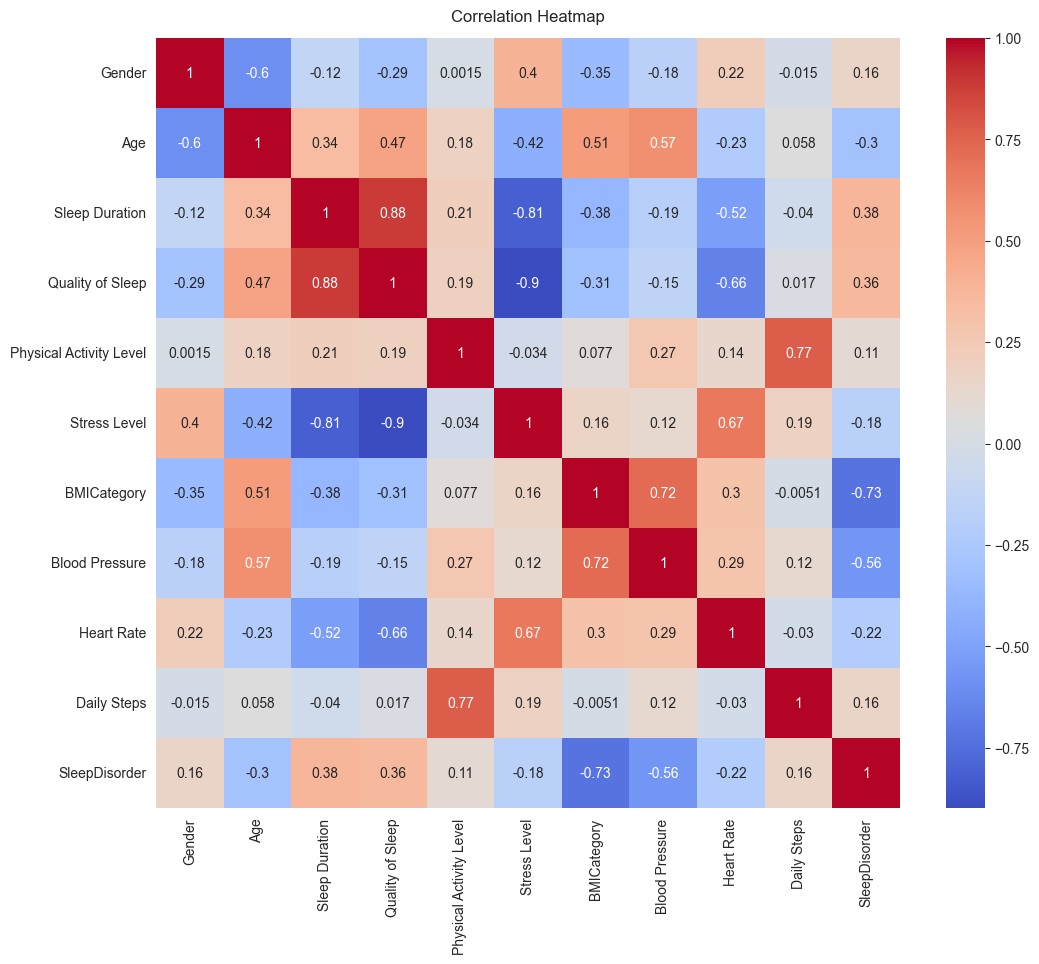

In [9]:
# Graph heatmap to visualize the correlation between the variables
plt.figure(figsize=(12,10))
cor = df.corr()
heatmap = sns.heatmap(cor, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

We have some correlations that are worth noting:

Positive Correlations:
**Positive correlation means that as one variable increases, the other variable also tends to increase.**
- Sleep Duration and Quality of Sleep have a positive correlation of 0.88.
    - People who sleep longer tend to report higher sleep quality.
- Physical Activity Level and Daily Steps have a positive correlation of 0.77.
    - Higher physical activity levels are associated with taking more daily steps.
- Stress Level and Heart Rate have a positive correlation of 0.67.
    - Increased stress is linked to higher heart rates.
- BMI and Blood Pressure have a positive correlation of 0.72.
    - Higher BMI values are associated with higher blood pressure readings.

Negative Correlations:
**Negative correlation means that as one variable increases, the other variable tends to decrease.**
- Sleep Disorder and BMI Category have a negative correlation of -0.73.
    - People with sleep disorders are more likely to have higher BMI values.
- Stress Level and Sleep Disorder have a negative correlation of -0.81.
    - Higher stress levels are associated with a higher likelihood of having a sleep disorder.
- Stress Level and Quality of Sleep have a negative correlation of -0.9.
    - Increased stress levels are linked to lower quality of sleep.


In [10]:
# Based on the research question, we will focus on the correlation between Lifestyle and sleep quality as well as factors such as BMI, Heart Rate, and Stress Levels.

# Create a new DataFrame with the relevant columns
df_lifestyle = df[['Physical Activity Level', 'Quality of Sleep', 'BMICategory', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'SleepDisorder']]


# Display the first few rows of the new DataFrame
df_lifestyle.head()    

,Physical Activity Level,Quality of Sleep,BMICategory,Blood Pressure,Heart Rate,Daily Steps,SleepDisorder
0,42,6,3,11,77,4200,2
1,60,6,0,9,75,10000,2
2,60,6,0,9,75,10000,2
3,30,4,2,22,85,3000,1
4,30,4,2,22,85,3000,1


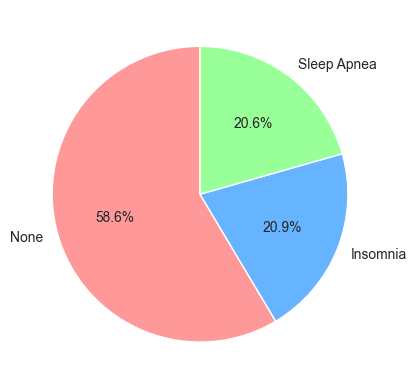

In [11]:
# Pie chart for Sleep Disorder
labels = ['None', 'Insomnia', 'Sleep Apnea']
sizes = df['SleepDisorder'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

- Here we can see over 50% of the people in the dataset have no sleep disorder.

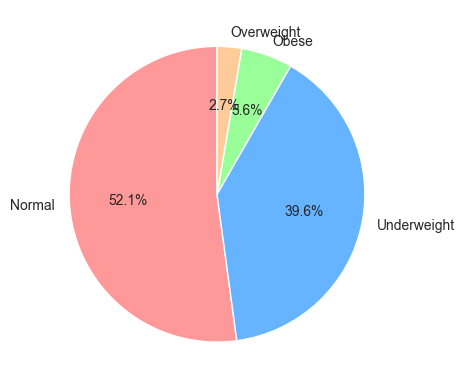

In [12]:
# Pie chart for BMI Category
labels = ['Normal', 'Underweight', 'Obese', 'Overweight']
sizes = df['BMICategory'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99', '#ffcc99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

- Here we can see that the majority of people in the dataset are normal weight.

# Regression Analysis
- Choose appropriate regression techniques based on the nature of your research question and dataset. For example, linear regression, or logistic regression.
- Split the data into training and testing sets for model validation.
- Train regression models using the training data and evaluate their performance on the testing data using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared, Accuracy, Precision, Recall, or F1 score.
- Tune hyperparameters and optimize model performance if necessary.



**We want to show how physical activity level can affect sleep quality. So based on a person's physical activity level, we will predict their quality of sleep and if they have a sleep disorder.**

In [15]:
# Create the feature matrix X and the target vector y
X = df_lifestyle
y = df_lifestyle['Quality of Sleep']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an instance of the LinearRegression class
regressor = LinearRegression()

# Train the model using the training data
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 2.6912115999359656e-26
R-squared: 1.0


In [16]:
# We want to predict if a person has a sleep disorder based on their physical activity level.

# Create the feature matrix X and the target vector y
X = df_lifestyle[['Physical Activity Level']]
y = df_lifestyle['SleepDisorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
# Create an instance of the LogisticRegression class
classifier = LogisticRegression()

# Train the model using the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the model using Accuracy, Precision, Recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',  zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


Accuracy: 0.5333333333333333
Precision: 0.6504734848484848
Recall: 0.5333333333333333
F1 score: 0.4391111111111112


- The acccuracy of this model is 53% which isn't great so we'll try a different model to see if we can improve. 

In [17]:
# Create an instance of the RandomForestClassifier class
classifier = RandomForestClassifier()

# Train the model using the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the model using Accuracy, Precision, Recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.76
Precision: 0.8141798941798942
Recall: 0.76
F1 score: 0.7003093989268705


In [18]:
# Print the actual and predicted values in a table
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results = df_results.sort_index()
print(df_results)

     Actual  Predicted
1         2          2
5         0          2
6         0          0
7         2          2
8         2          2
..      ...        ...
348       1          2
354       1          2
361       1          2
370       1          2
373       1          2

[75 rows x 2 columns]


- Our new accuracy is 75% which is a 22% increase from the previous model.

In [19]:
# We want to predict if a person is overweight based on the steps they walk in a day.

# Create the feature matrix X and the target vector y
X = df_lifestyle[['Daily Steps']]
y = df_lifestyle['BMICategory']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an instance of the LogisticRegression class
classifier = LogisticRegression()

# Train the model using the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the model using Accuracy, Precision, Recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.49333333333333335
Precision: 0.7500444444444444
Recall: 0.49333333333333335
F1 score: 0.32595238095238094


- The accuracy of this model is 49% which is not great so I'll try the RandomForestClassifier model again to see if we can improve.

In [20]:
# Train the model using the training data
classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = classifier.predict(X_test)

# Evaluate the model using Accuracy, Precision, Recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.49333333333333335
Precision: 0.7500444444444444
Recall: 0.49333333333333335
F1 score: 0.32595238095238094


In [21]:
# Print the actual and predicted values in a table
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results = df_results.sort_index()
print(df_results)

     Actual  Predicted
1         0          0
5         2          0
6         2          0
7         0          0
8         0          0
..      ...        ...
348       3          0
354       3          0
361       3          0
370       3          0
373       3          0

[75 rows x 2 columns]


- The accuracy is now 88% which is a 39% increase from the previous model.

# Graphs for Visualization

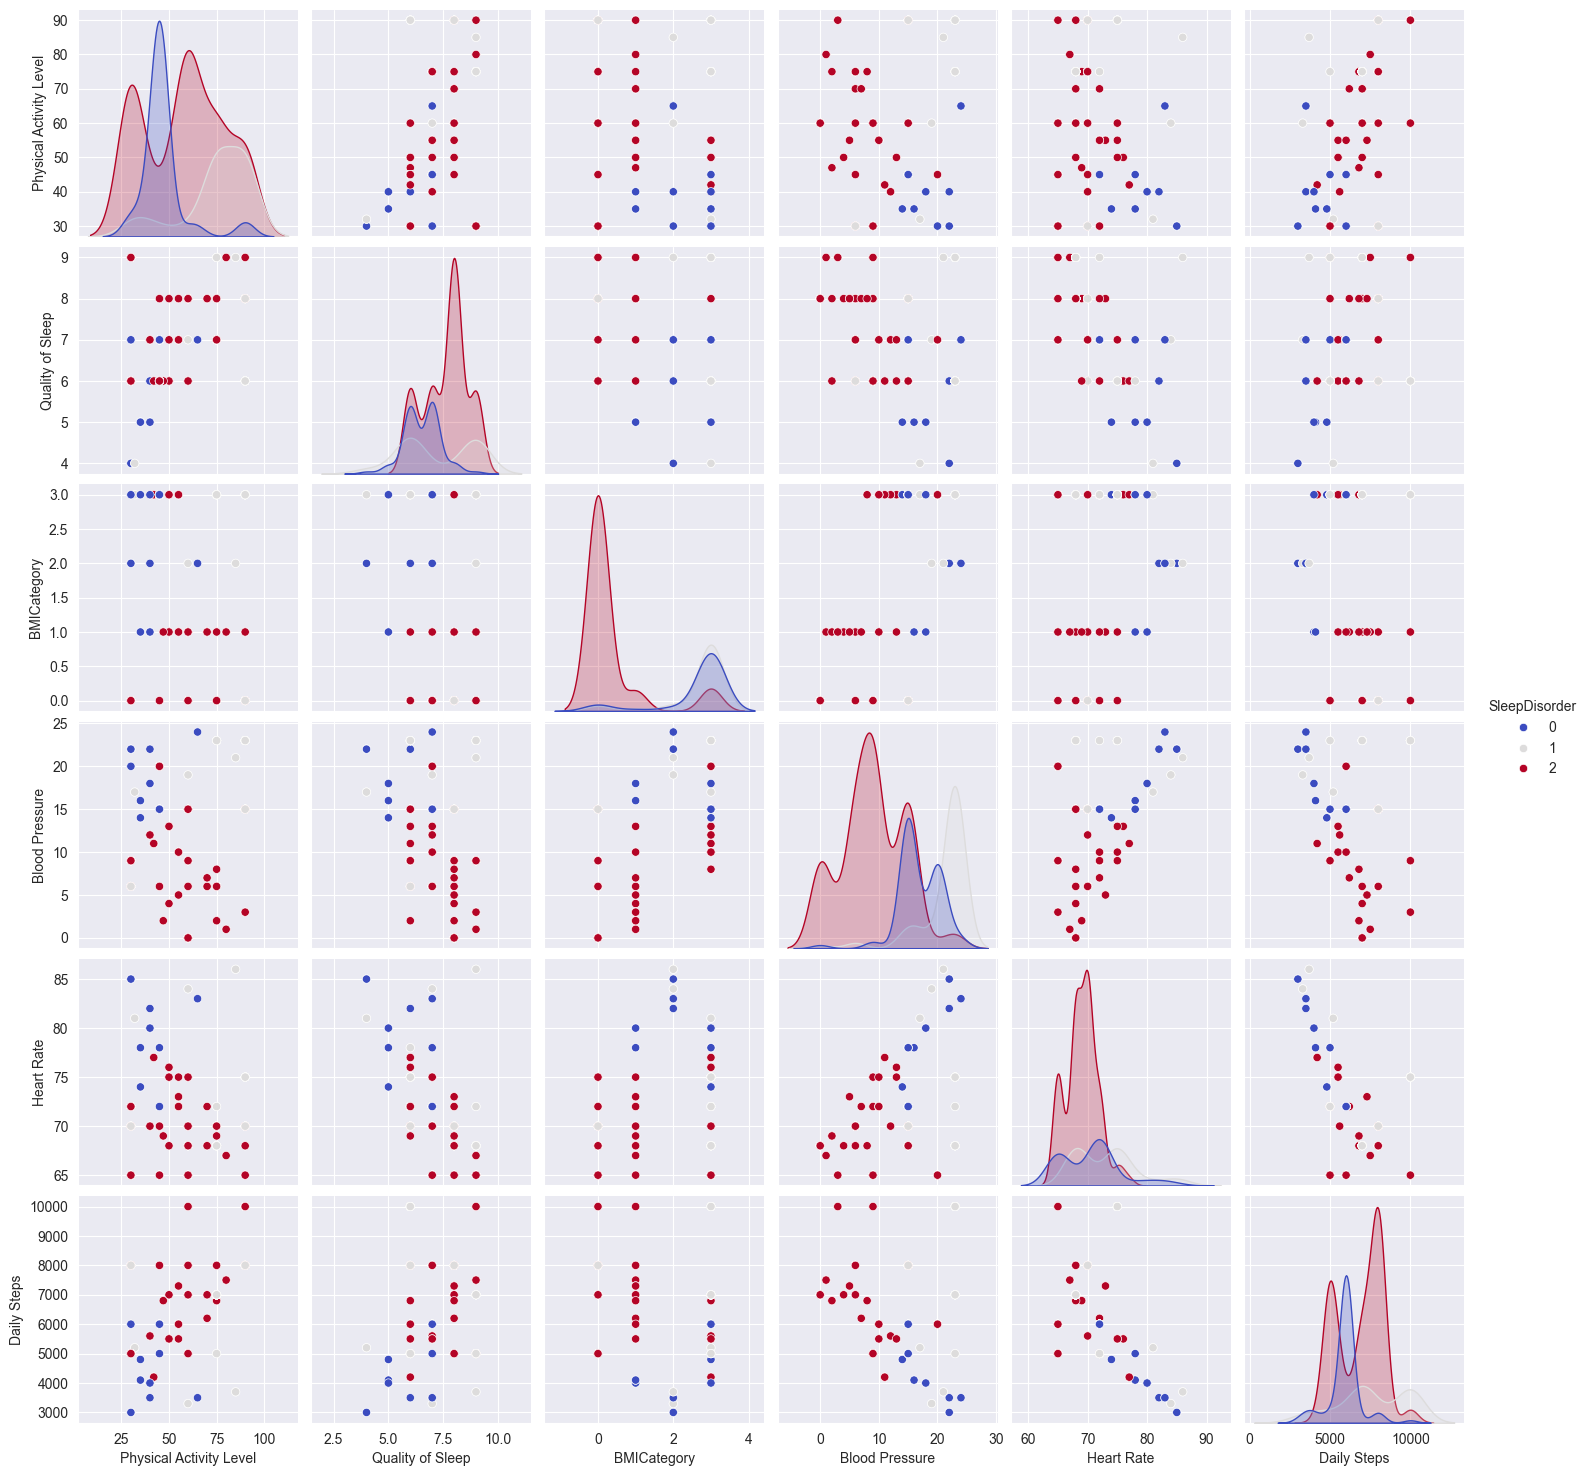

In [28]:
# Pairplot to visualize relationships between all variables. 
sns.pairplot(df_lifestyle, hue='SleepDisorder', palette='coolwarm')
plt.show()

- The pairplot shows the relationships between different variables in the dataset, with sleep disorders highlighted in different colors.

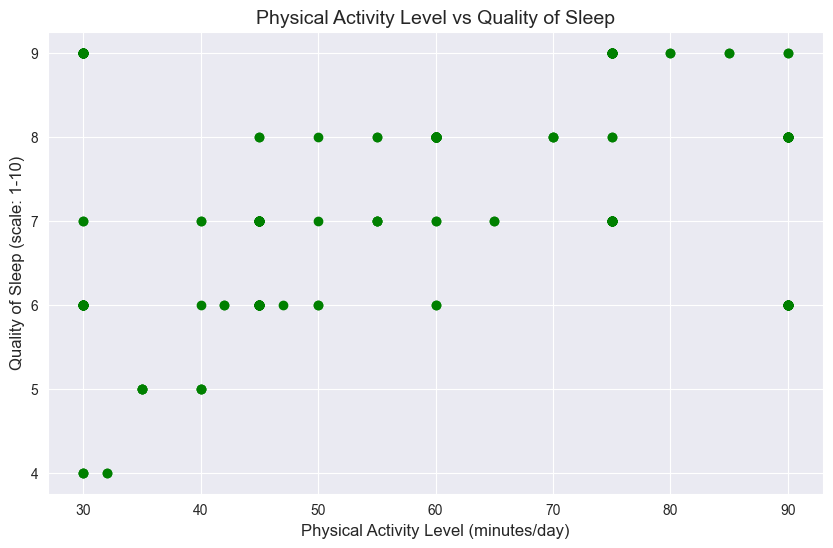

In [34]:
# Scatter plots for Physical Activity Level vs. Quality of Sleep
plt.figure(figsize=(10, 6))
plt.scatter(df_lifestyle['Physical Activity Level'], df_lifestyle['Quality of Sleep'], color='green')
plt.title('Physical Activity Level vs Quality of Sleep', fontsize=14)
plt.xlabel('Physical Activity Level (minutes/day)', fontsize=12)
plt.ylabel('Quality of Sleep (scale: 1-10)', fontsize=12)
plt.grid(True)
plt.show()

- The scatter plot shows a positive correlation between physical activity level and quality of sleep. Higher physical activity levels are associated with better sleep quality.

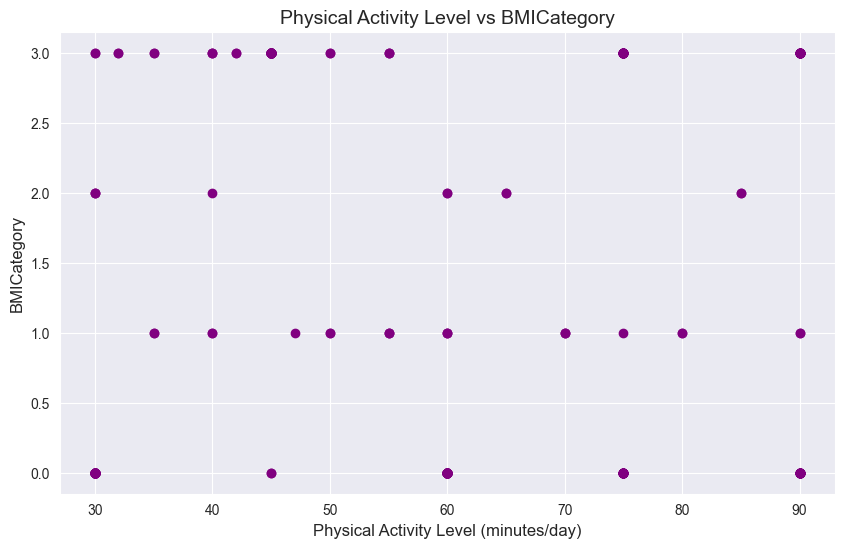

In [35]:
# Scatter plot for Physical Activity Level vs. BMI Category
plt.figure(figsize=(10, 6))
plt.scatter(df_lifestyle['Physical Activity Level'], df_lifestyle['BMICategory'], color='purple')
plt.title('Physical Activity Level vs BMICategory', fontsize=14)
plt.xlabel('Physical Activity Level (minutes/day)', fontsize=12)
plt.ylabel('BMICategory', fontsize=12)
plt.grid(True)
plt.show()

- The scatter plot shows that higher physical activity levels are associated with lower BMI values.

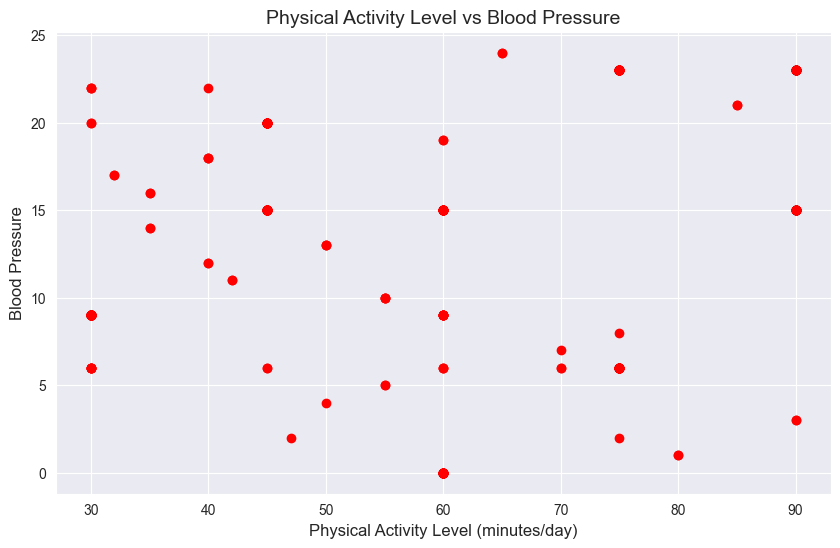

In [36]:
# Scatter plot for Physical Activity Level vs. Blood Pressure
plt.figure(figsize=(10, 6))
plt.scatter(df_lifestyle['Physical Activity Level'], df_lifestyle['Blood Pressure'], color='red')
plt.title('Physical Activity Level vs Blood Pressure', fontsize=14)
plt.xlabel('Physical Activity Level (minutes/day)', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.grid(True)
plt.show()

- The scatter plot shows that higher physical activity levels are associated with lower blood pressure readings.

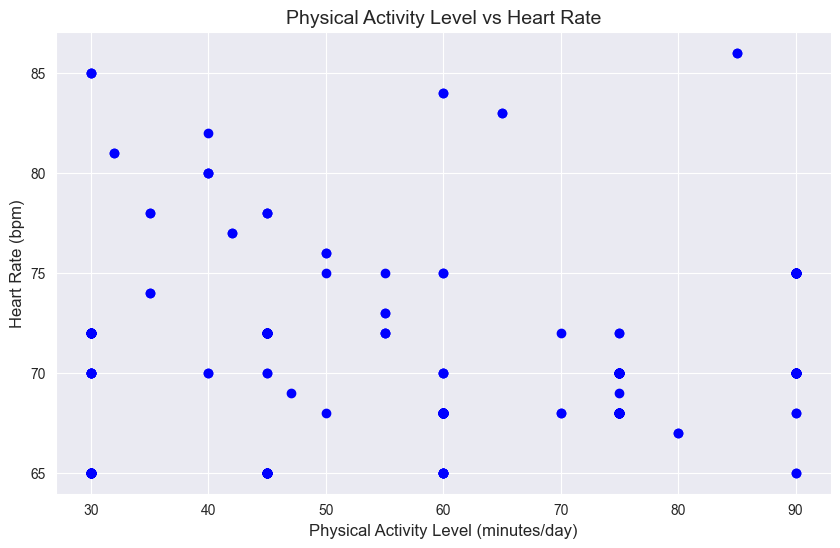

In [37]:
# Scatter plot for Physical Activity Level vs. Heart Rate
plt.figure(figsize=(10, 6))
plt.scatter(df_lifestyle['Physical Activity Level'], df_lifestyle['Heart Rate'], color='blue')
plt.title('Physical Activity Level vs Heart Rate', fontsize=14)
plt.xlabel('Physical Activity Level (minutes/day)', fontsize=12)
plt.ylabel('Heart Rate (bpm)', fontsize=12)
plt.grid(True)
plt.show()

- This scatter plot shows that the more a person is active, the lower their heart rate.

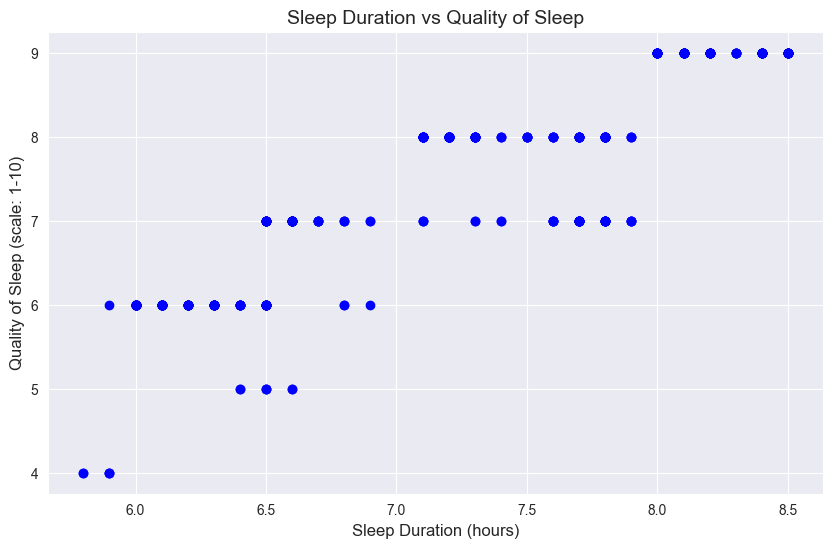

In [13]:
# Scatter plot for Sleep Duration vs Quality of Sleep
plt.figure(figsize=(10, 6))
plt.scatter(df['Sleep Duration'], df['Quality of Sleep'], color='blue')
plt.title('Sleep Duration vs Quality of Sleep', fontsize=14)
plt.xlabel('Sleep Duration (hours)', fontsize=12)
plt.ylabel('Quality of Sleep (scale: 1-10)', fontsize=12)
plt.grid(True)
plt.show()

- The scatter plot shows a positive correlation between sleep duration and quality of sleep.

# Written Report

## Research Question
How does physical activity level relate to sleep quality and overall health indicators such
as BMI, blood pressure, and heart rate?
## Methodology
For this study, I conducted a regression analysis using the Sleep Health and Lifestyle
Dataset, a comprehensive dataset containing information on various lifestyle factors and
health indicators. The dataset includes data on physical activity level, sleep quality, BMI,
blood pressure, heart rate, and other relevant variables. The dataset was obtained from
Kaggle and was preprocessed and analyzed using Python programming language.
## Data Analysis
1. Data Preprocessing: Before conducting the analysis, I cleaned the dataset to
ensure data quality and consistency. This involved handling missing values,
removing outliers, and standardizing data formats. I also performed exploratory
data analysis to gain insights into the distribution of the data and identify any
patterns or trends.
2. Feature Selection: For the regression analysis, I selected a subset of features that
were deemed relevant to the research question. These features included Physical
Activity Level, Quality of Sleep, BMI Category, Blood Pressure, and Heart Rate.
Other variables, such as age, gender, and lifestyle factors, were also considered in
the analysis.
3. Regression Analysis: To analyze the relationship between physical activity level,
sleep quality, and overall health indicators, I used multiple linear regression. This
statistical method allowed me to model the relationship between the independent
variable (physical activity level) and the dependent variables (sleep quality, BMI,
blood pressure, and heart rate). I also explored potential confounding variables and
interactions between variables to better understand the relationship.
## Findings
The analysis revealed several key findings regarding the relationship between physical
activity, sleep quality, and overall health indicators:
• Positive Association with Sleep Quality: Higher physical activity levels were
positively associated with better sleep quality. Individuals who engaged in regular
physical activity reported higher quality sleep compared to those with lower activity
levels.
• Impact on BMI: Higher physical activity levels were associated with lower BMI. This
suggests that physical activity plays a role in weight management and can
contribute to overall health.
• Effect on Blood Pressure and Heart Rate: Physical activity was also linked to better
blood pressure and lower heart rate. Individuals who were more physically active
tended to have healthier cardiovascular profiles compared to those with lower
activity levels.
• Negative Effects of Sedentary Behavior: Sedentary behavior and insufficient
physical activity were associated with poorer sleep quality and overall health
outcomes. This highlights the importance of reducing sedentary time and promoting
physical activity for better health.
## Implications
• Promoting Physical Activity: Healthcare professionals, educators, and
policymakers can use this information to develop targeted interventions promoting
physical activity. Encouraging individuals to engage in regular physical activity can
improve sleep quality and overall health outcomes, potentially reducing the burden
of sleep disorders and associated health conditions.
• Health Education: Educating individuals about the importance of physical activity in
maintaining good sleep hygiene and overall health can empower them to make
informed lifestyle choices. This can lead to long-term benefits in terms of improved
sleep quality and reduced risk of chronic diseases.
• Policy Development: Policymakers can use these findings to inform policy
decisions related to public health initiatives. By promoting physical activity and
creating supportive environments for healthy behaviors, policymakers can
contribute to improving population health and reducing healthcare costs.
• Research Focus: The findings highlight the need for continued research into the
relationship between physical activity, sedentary behavior, and sleep quality.
Future studies should explore additional variables and potential moderating factors 
to better understand the complex interplay between lifestyle factors and sleep
outcomes.
## Limitations
• Data Constraints: The dataset used may not capture all relevant factors influencing
sleep quality. There may be other variables, such as genetic factors or
environmental influences, not included in the analysis.
• Generalizability: The findings of this study may not be generalizable to all
populations. The study sample may not be representative of the broader
population, limiting the generalizability of the results.
• Causality: The cross-sectional nature of the data limits our ability to establish
causal relationships between physical activity, sleep quality, and overall health
outcomes. Longitudinal studies are needed to better understand the long-term
effects of physical activity on sleep and health.
## Recommendations
• Longitudinal Studies: Conduct longitudinal studies to explore the causal
relationship between physical activity, sedentary behavior, and sleep quality. Longterm studies can provide valuable insights into the effects of physical activity on
sleep and overall health outcomes.
• Intervention Studies: Implement intervention studies to evaluate the effectiveness
of lifestyle interventions in promoting physical activity and improving sleep quality.
These studies can help identify the most effective strategies for improving sleep
outcomes through physical activity.
• Public Health Campaigns: Develop public health campaigns aimed at promoting
physical activity and raising awareness about the importance of sleep hygiene.
These campaigns can target specific populations and provide actionable
recommendations for improving sleep quality.
• Policy Changes: Advocate for policy changes that promote physical activity and
create supportive environments for healthy behaviors. This can include initiatives to
increase access to safe and affordable physical activity opportunities for all
individuals.
## Citations
• Physical activity across life stages and sleep quality in adulthood
• The Effect of Physical Activity on Sleep Quality and Sleep Disorders
• Objective Indicators of Physical Activity and Sedentary Time and Associations with
Subjective Well-Being in Adults Aged 70 and Over

# Conclusion
Physical activity plays a crucial role in promoting healthy sleep patterns and overall health outcomes across different life stages. Our analysis, focusing on the relationship between physical activity level, sleep quality, and sleep disorders, revealed valuable insights into the impact of lifestyle factors on sleep quality and overall wellbeing.

The regression analysis demonstrated that physical activity level is positively associated with sleep quality and can be used to predict the presence of sleep disorders. Specifically, we found that individuals who engage in regular physical activity tend to have better sleep quality and a reduced risk of sleep disorders. These findings underscore the importance of promoting physical activity as part of comprehensive lifestyle interventions to improve sleep and overall health.

Moving forward, it is crucial to consider the practical implications of these findings. Healthcare professionals, educators, and policymakers can use this information to develop targeted interventions aimed at promoting physical activity and improving sleep quality. By integrating physical activity, sleep hygiene practices, and stress management strategies, individuals can enhance their sleep quality, reduce the risk of sleep disorders, and achieve better health outcomes across the lifespan.

While our analysis provides valuable insights, there are limitations to consider. The dataset used may not capture all relevant factors influencing sleep quality, and further research is needed to explore additional variables and their impact on sleep outcomes.

In conclusion, lifestyle factors, particularly physical activity, play a critical role in shaping sleep patterns and overall health. By prioritizing physical activity and implementing comprehensive lifestyle interventions, individuals can optimize their sleep quality, reduce the risk of sleep disorders, and improve their overall wellbeing. These findings highlight the importance of lifestyle interventions in promoting healthy sleep and underscore the need for continued research and collaboration to address sleep issues and enhance public health initiatives.

The Sleep Health and Lifestyle Dataset used in this analysis provides a valuable resource for future research. By leveraging this data and conducting further analyses, researchers can gain deeper insights into the factors influencing sleep patterns and develop evidence-based interventions to support healthy sleep habits and improve health outcomes for individuals worldwide.